### 导数 亚导数

将导数拓展到不可微的函数，如绝对值函数，和max函数
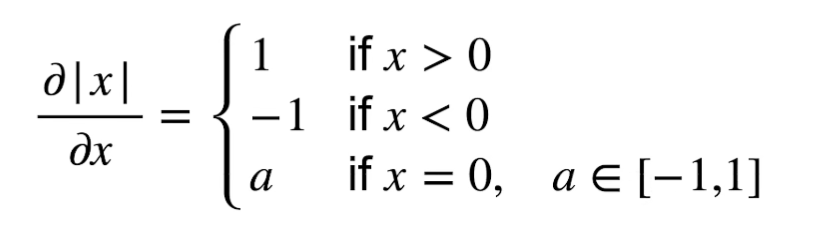 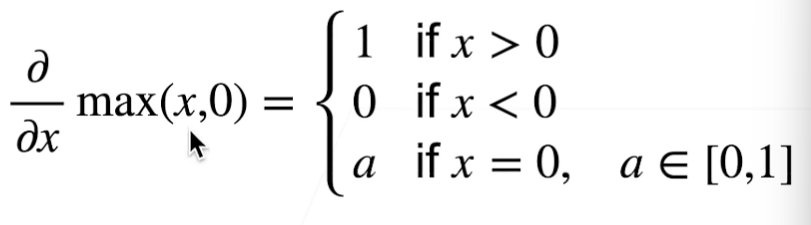

## 梯度
导数拓展到向量，分子、分母分表为标量和向量的情况
- 分子标量， 分母标量， 结果标量
- 分子标量， 分母向量， 结果向量， 如果分母列向量，结果行向量
- 分子向量， 分母标量， 结果向量， 如果分子列向量，结果列向量
- 分子向量， 分母向量， 结果矩阵
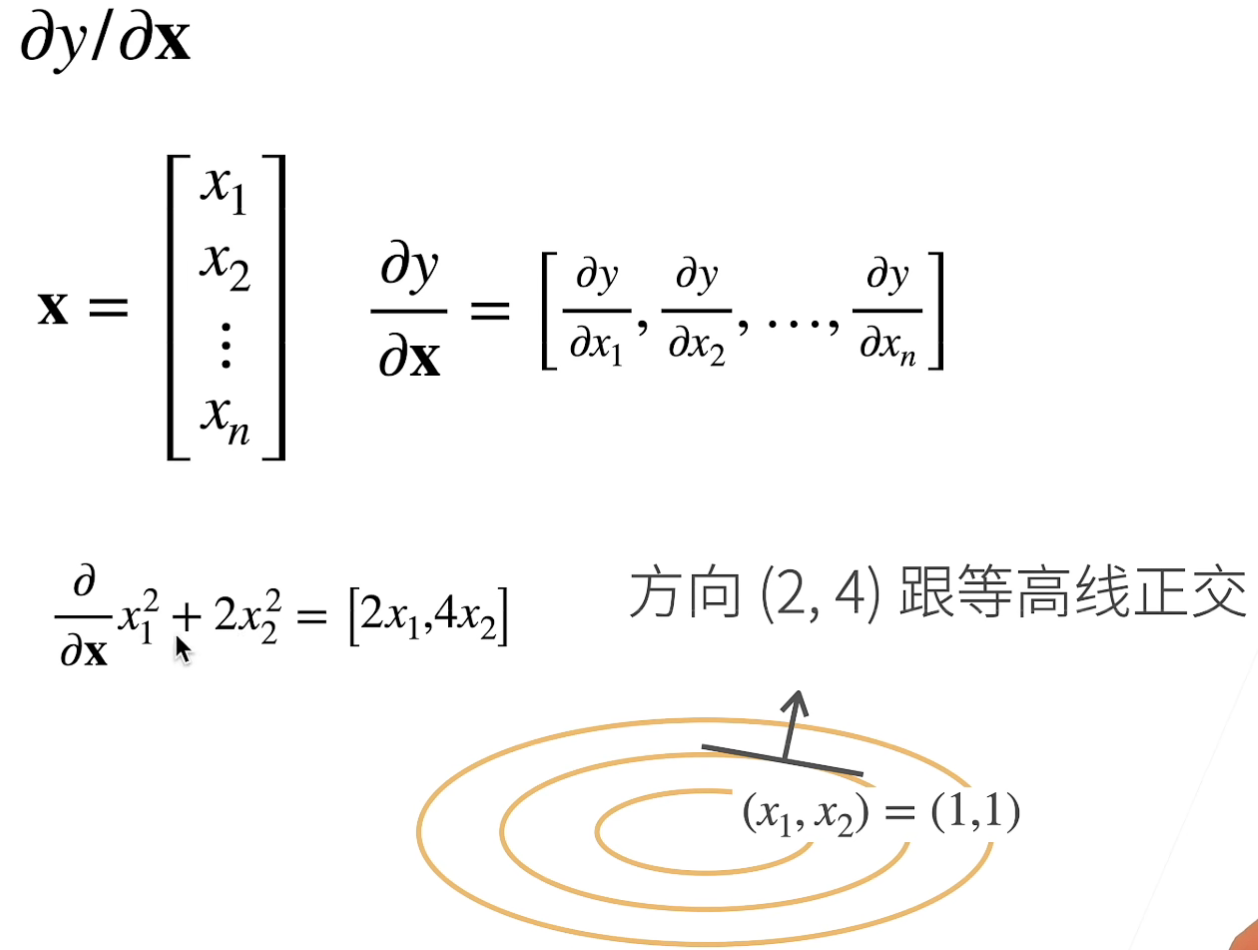
## 梯度跟等高线正交，指向变化最大的地方
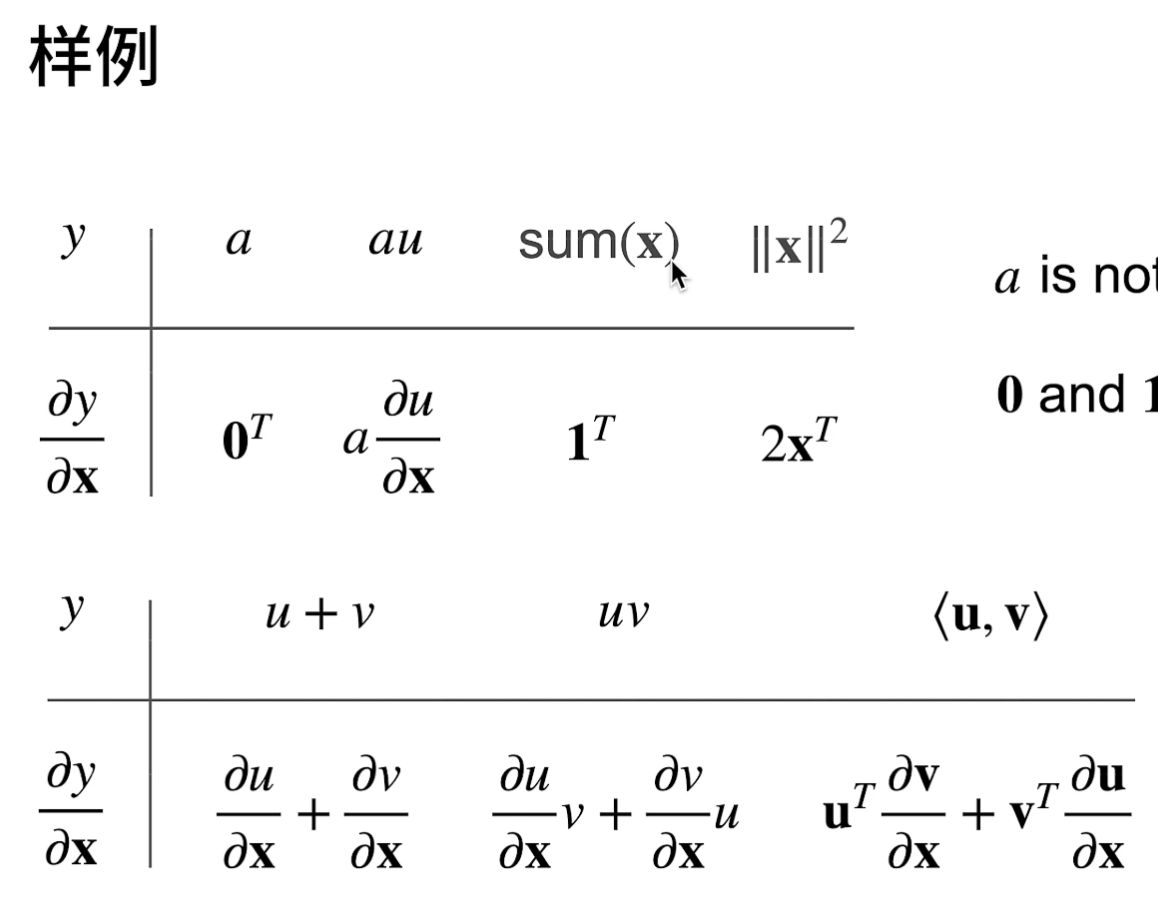
## a不是x函数， 0 1均为向量
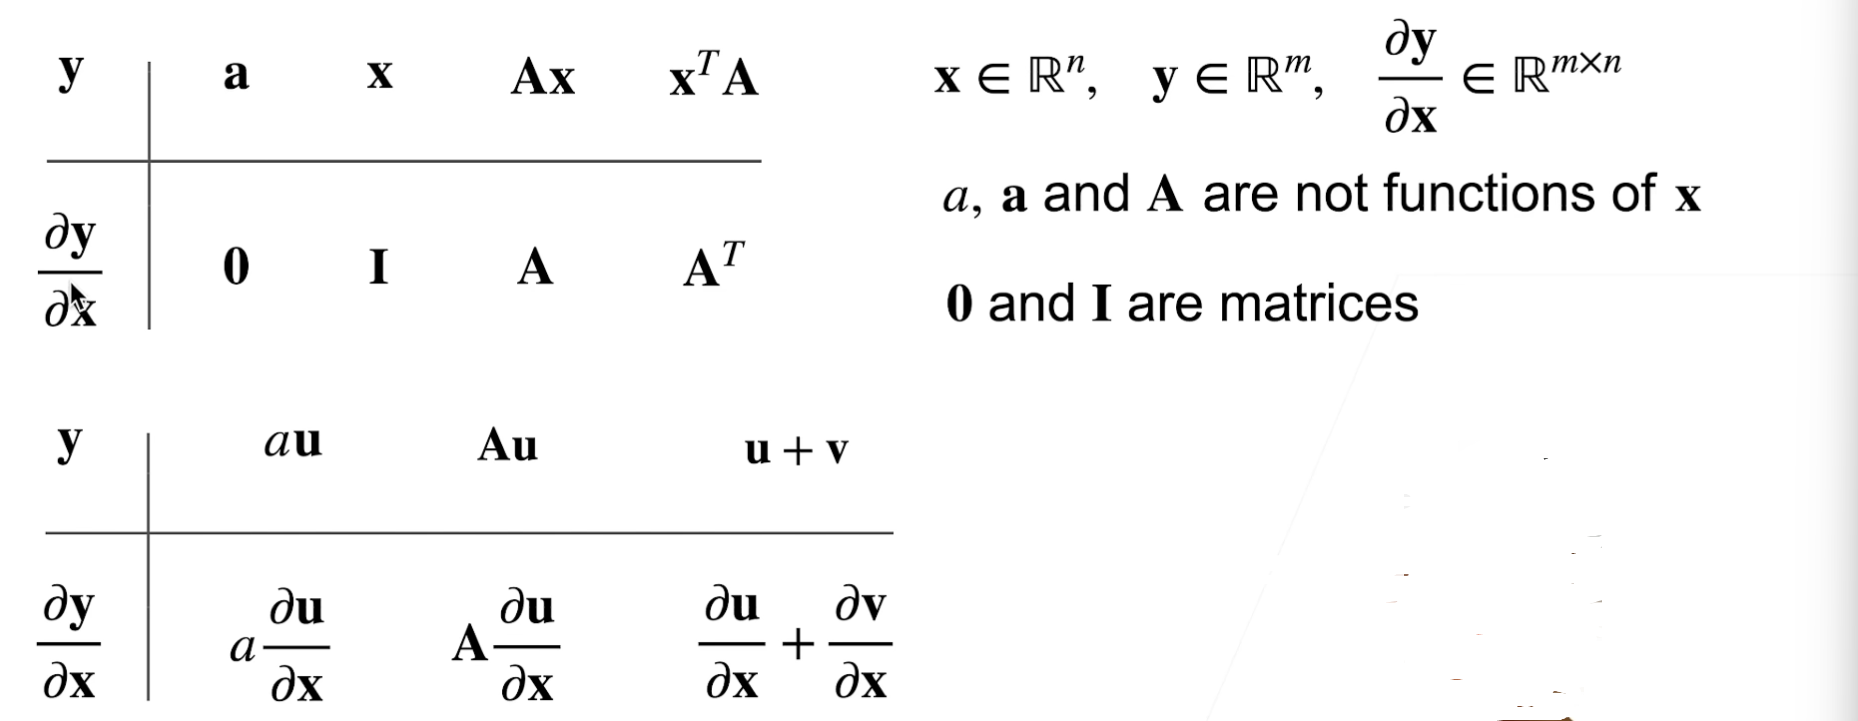
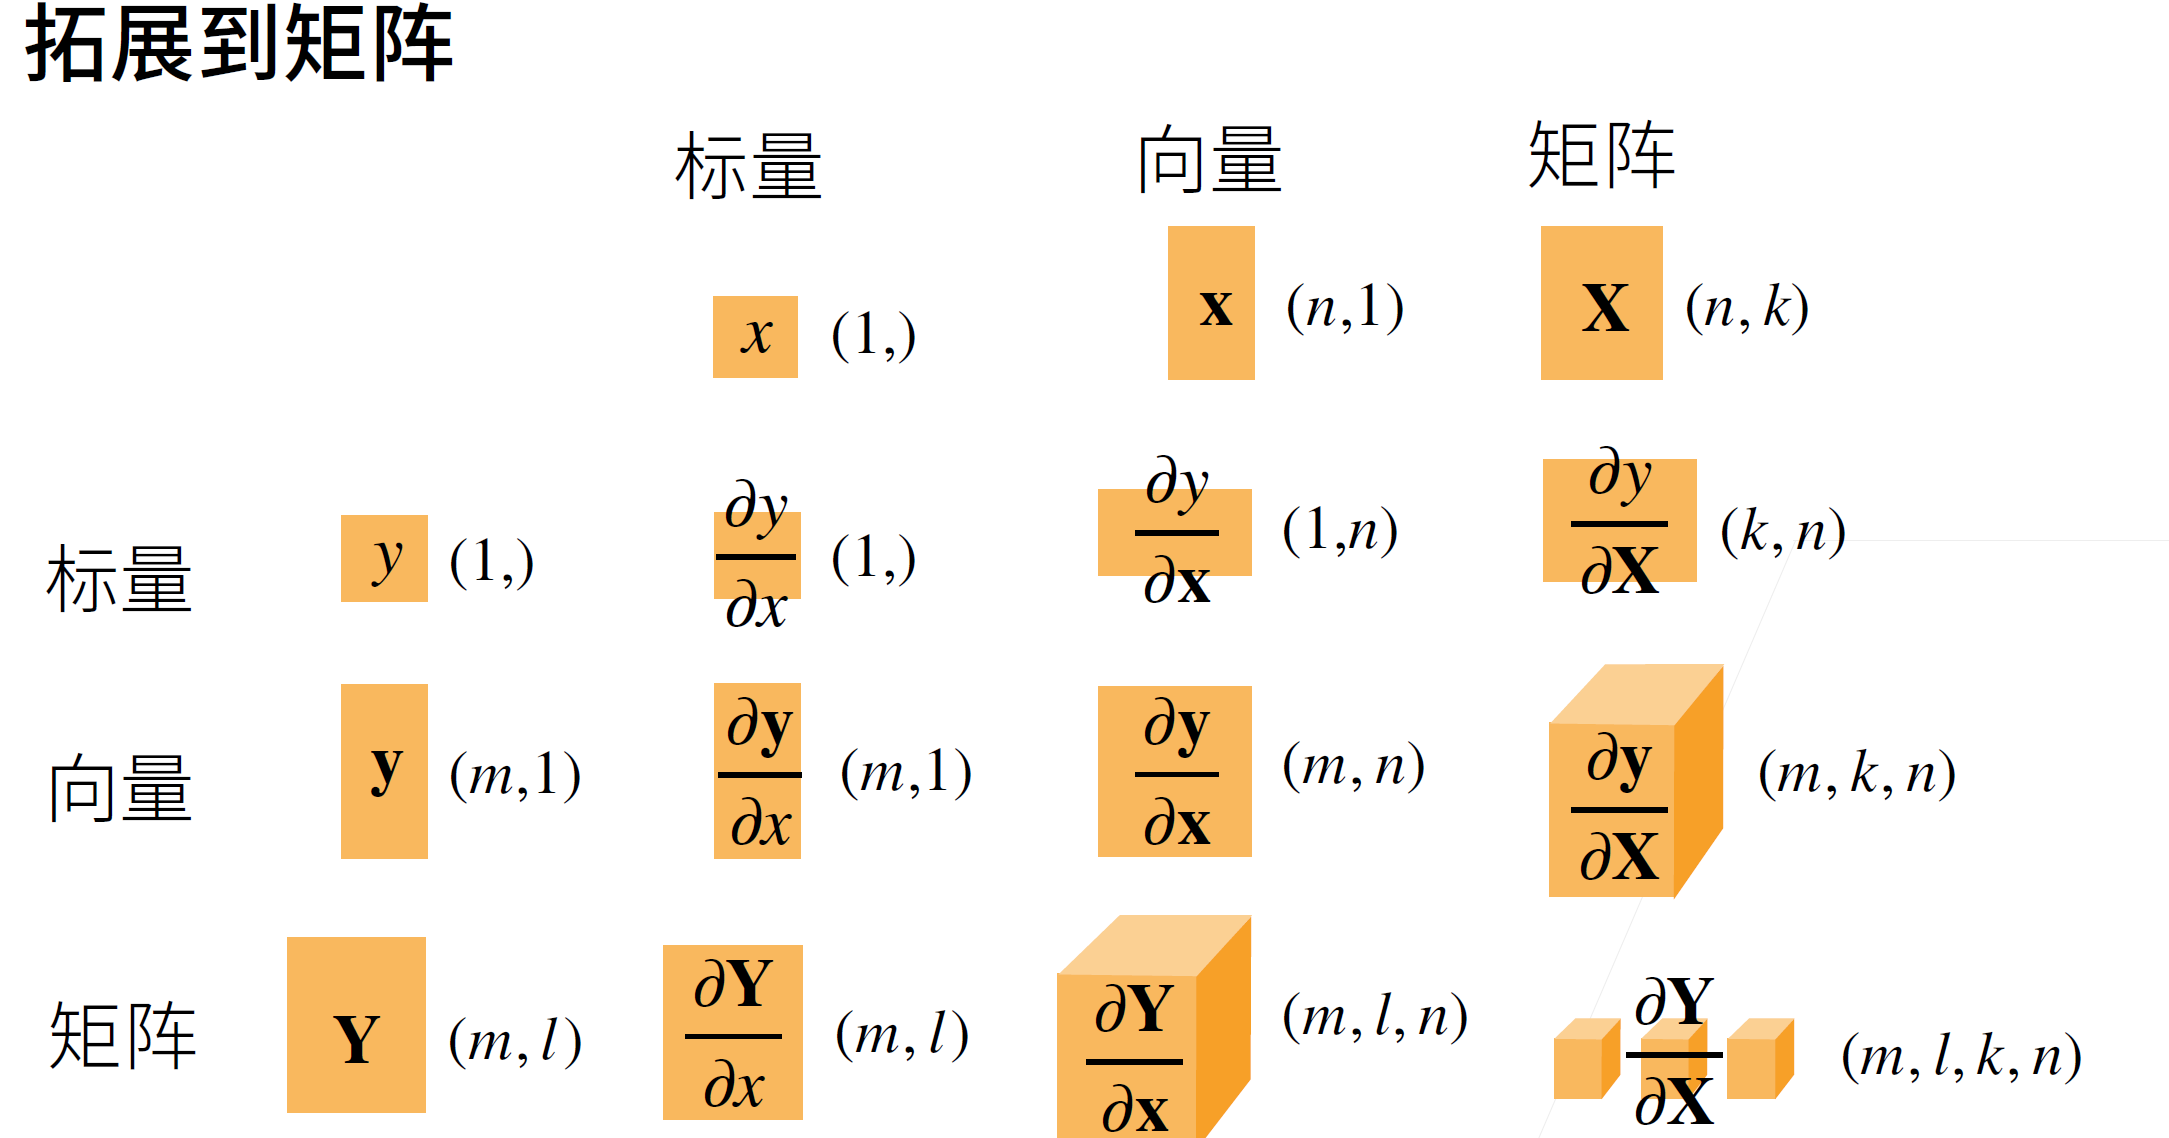
## 一句话：在上面的维度不转，在下面的维度翻转

# 向量链式法则
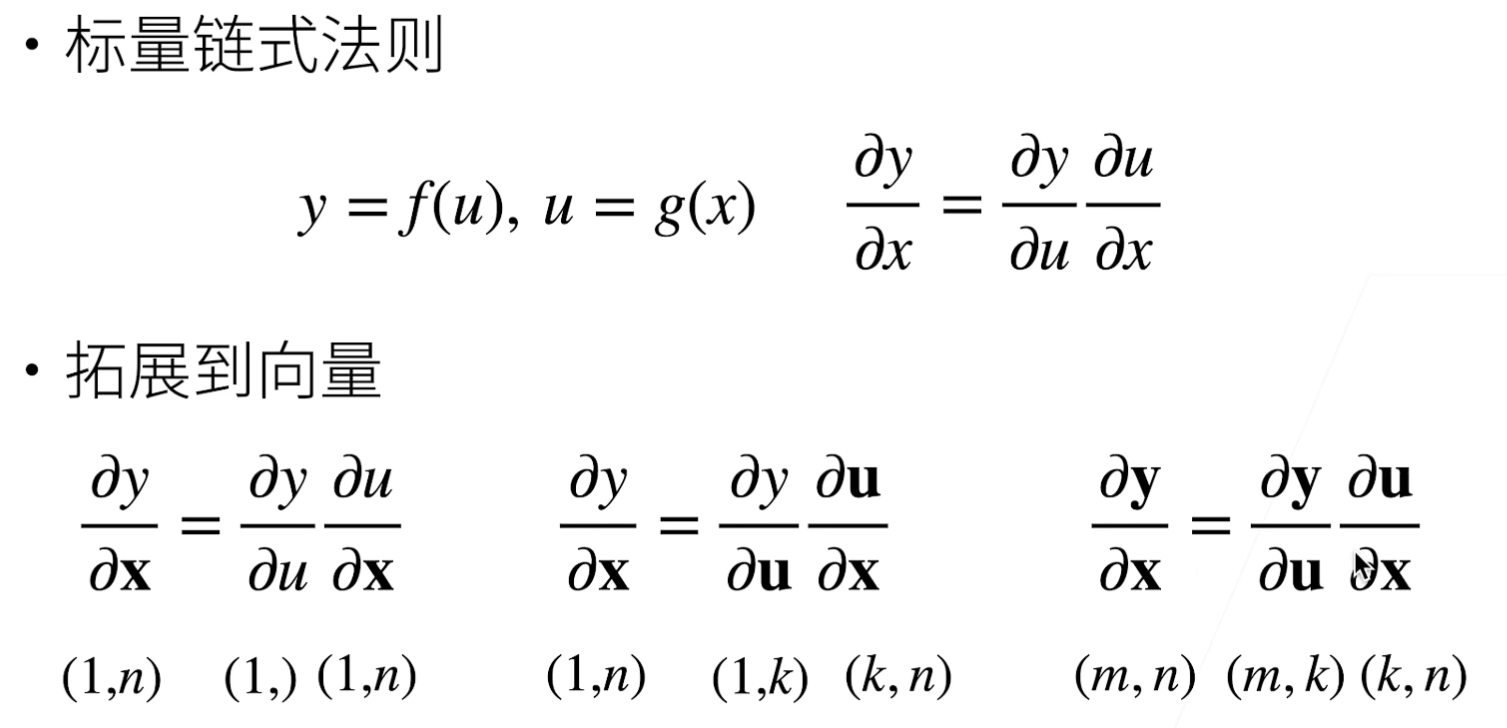
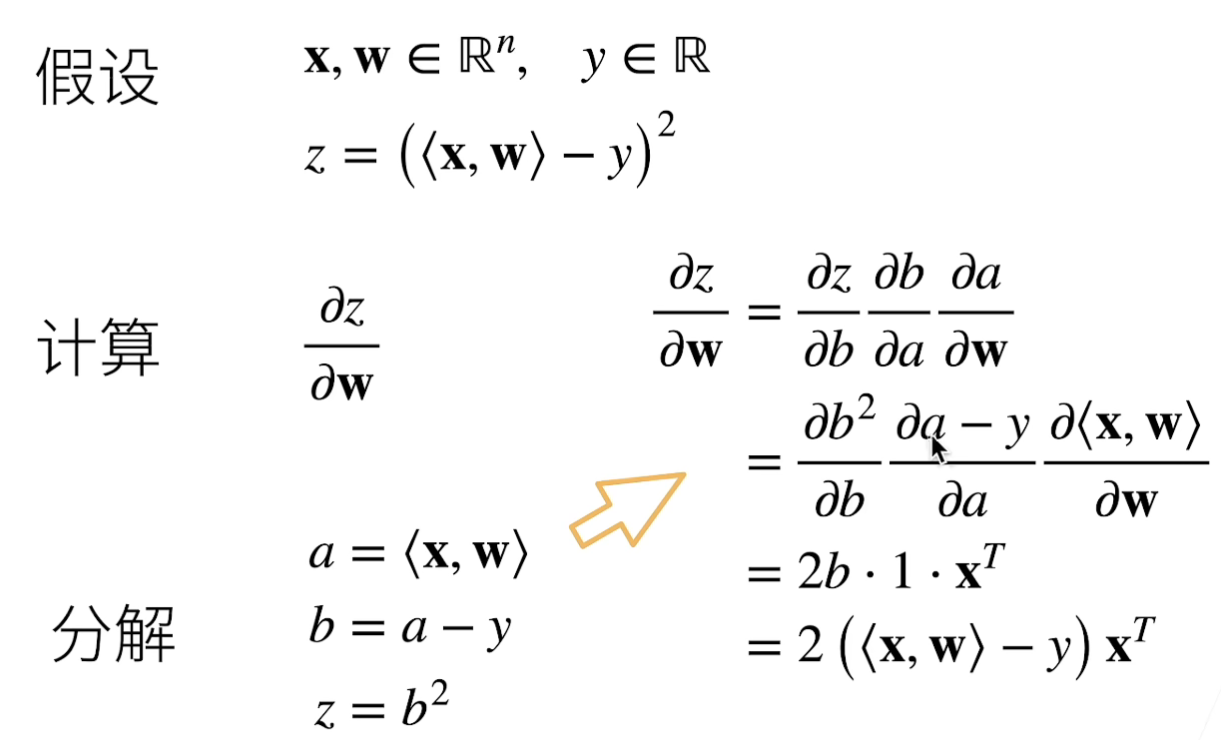
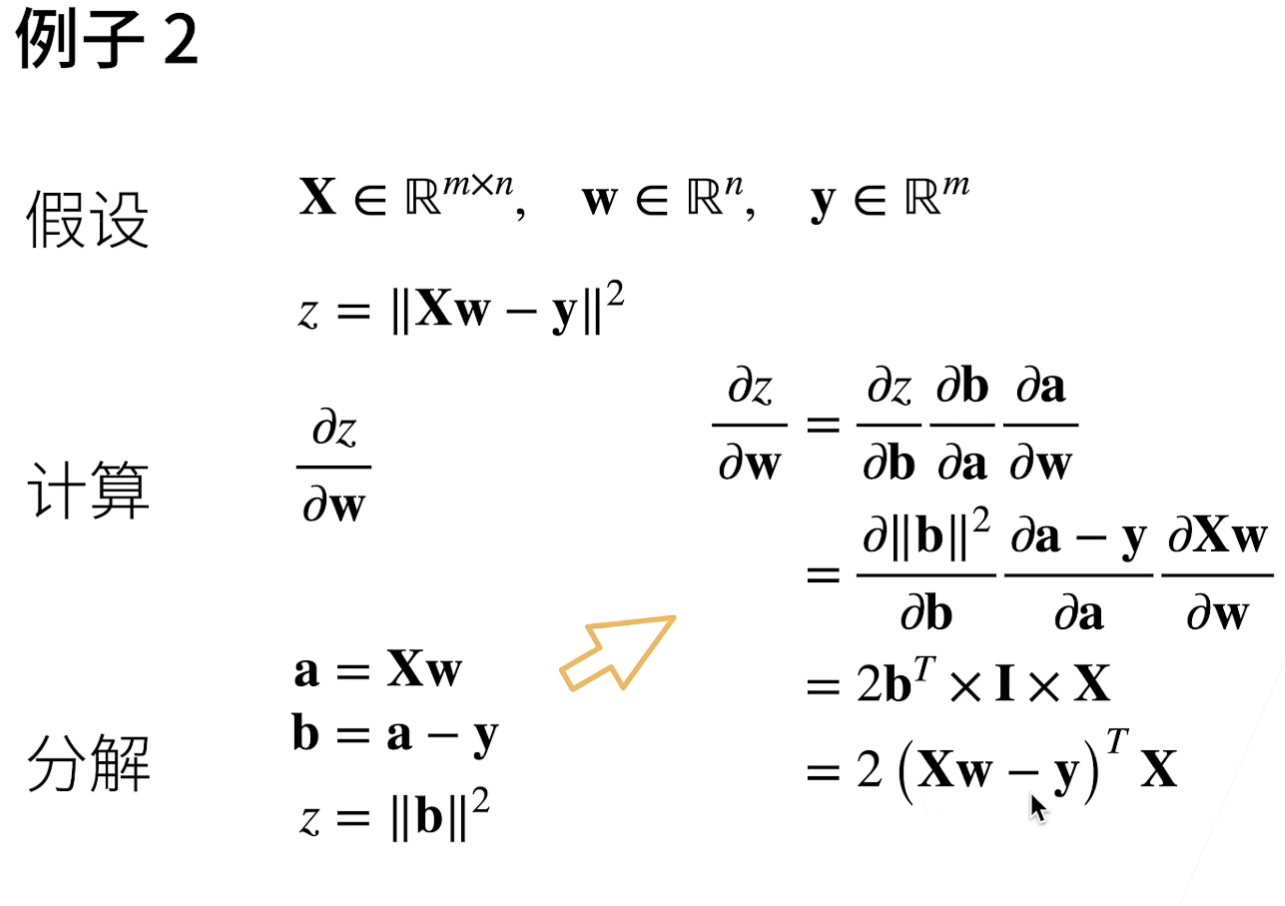

# 自动求导
### 自动求导有别于符号求导（显式数学符号），数值求导（无穷），它计算一个函数在指定值上的导数
# 计算图
- 将代码分解成操作子，将计算表示成一个无环图 ，
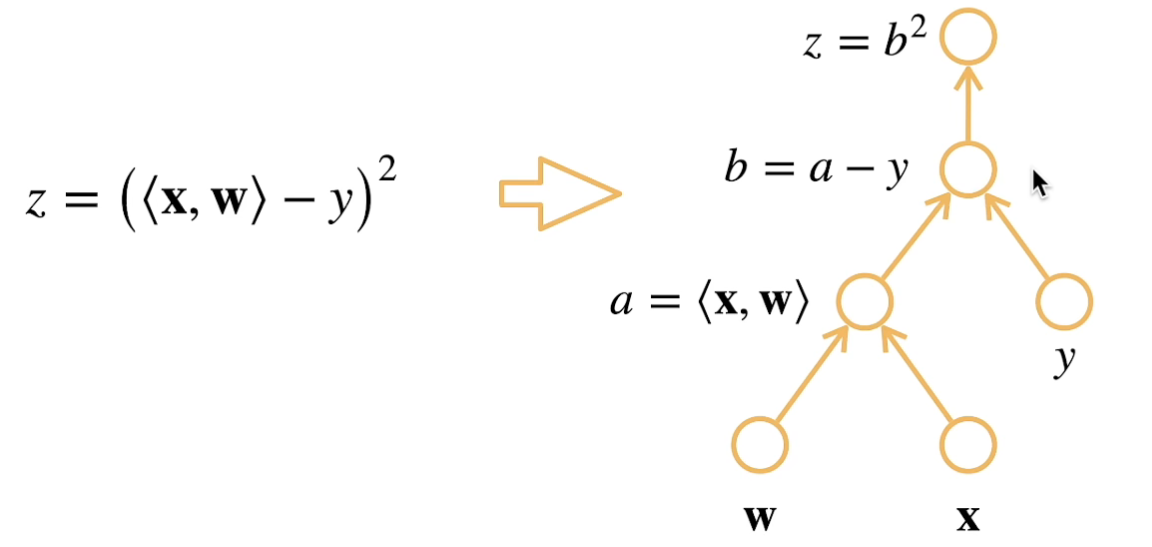
- 显式构造，Tensorflow/Theano/MXNet
- 隐式构造，Pytorch/MXNet
## 自动求导两种方式
基本原理链式法则：
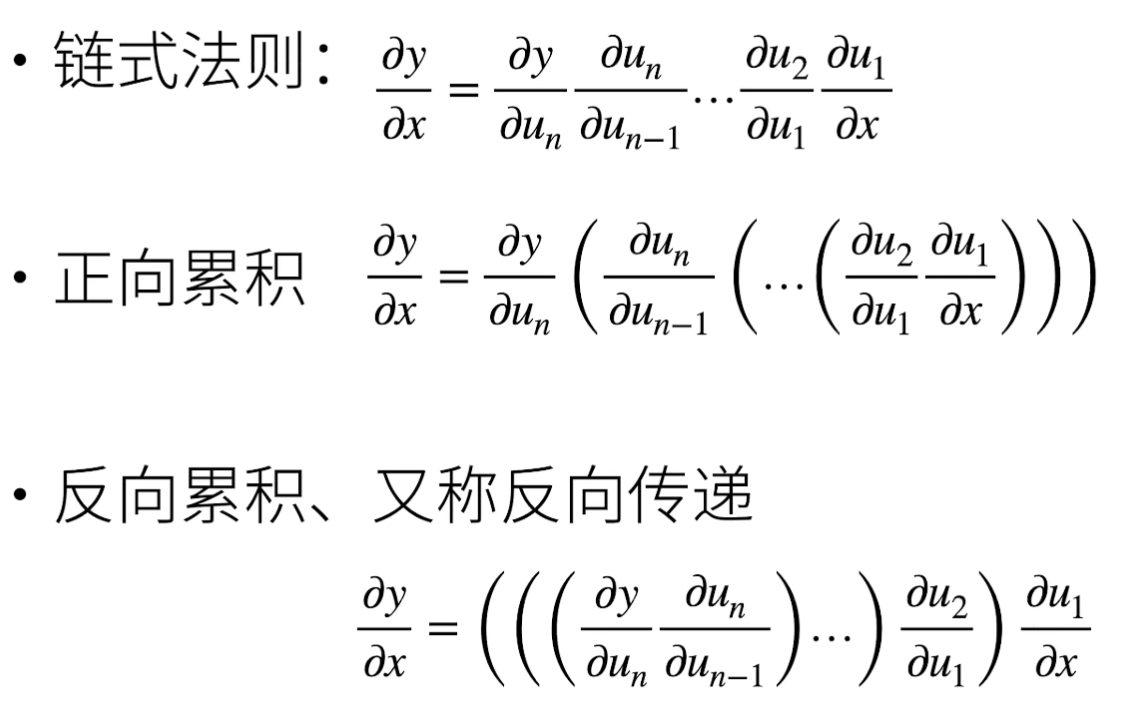
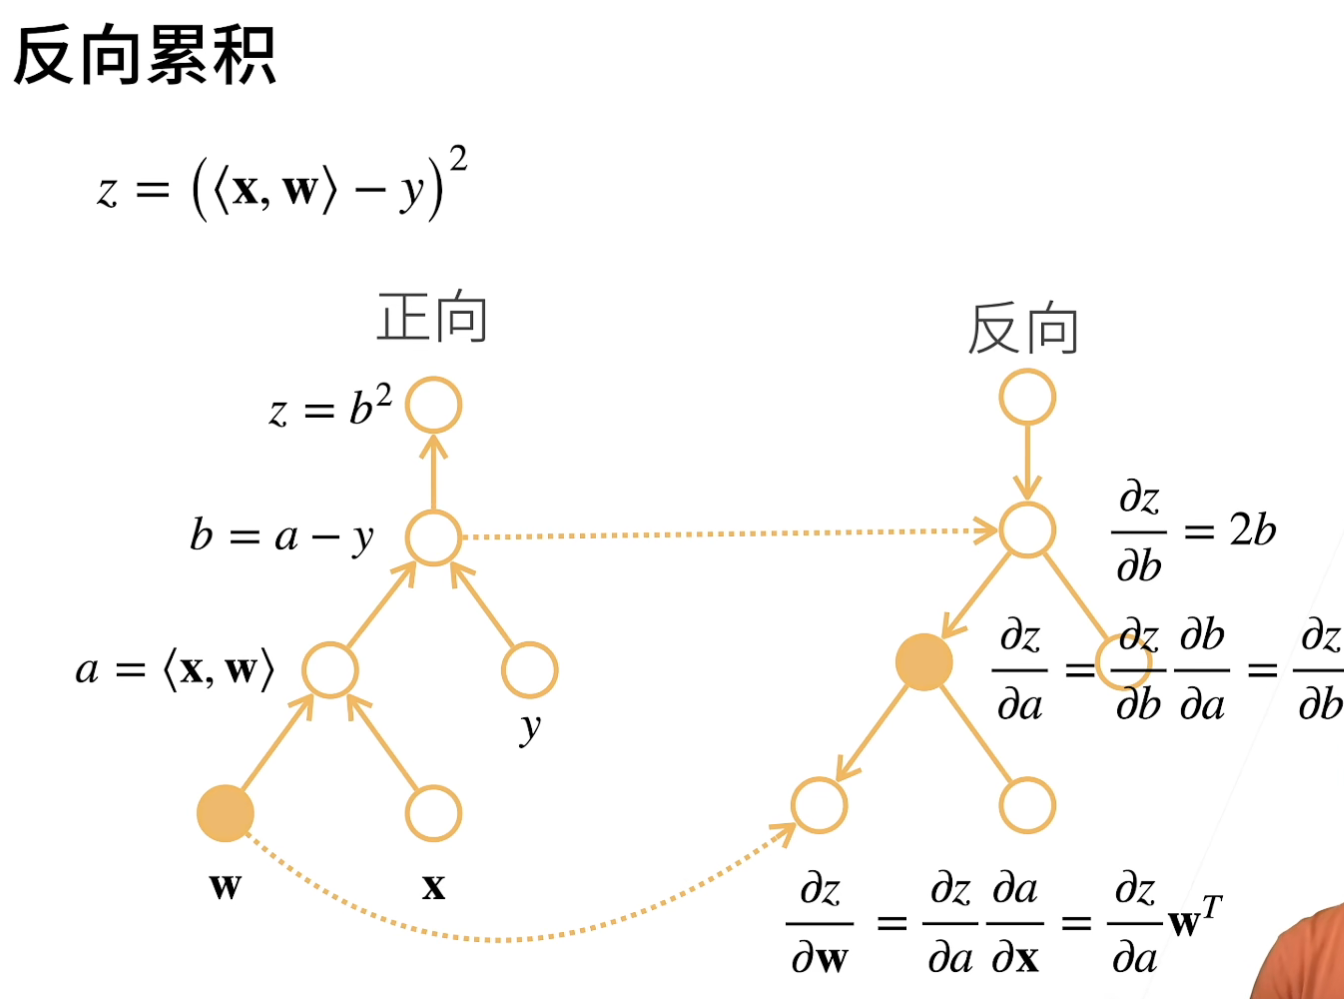
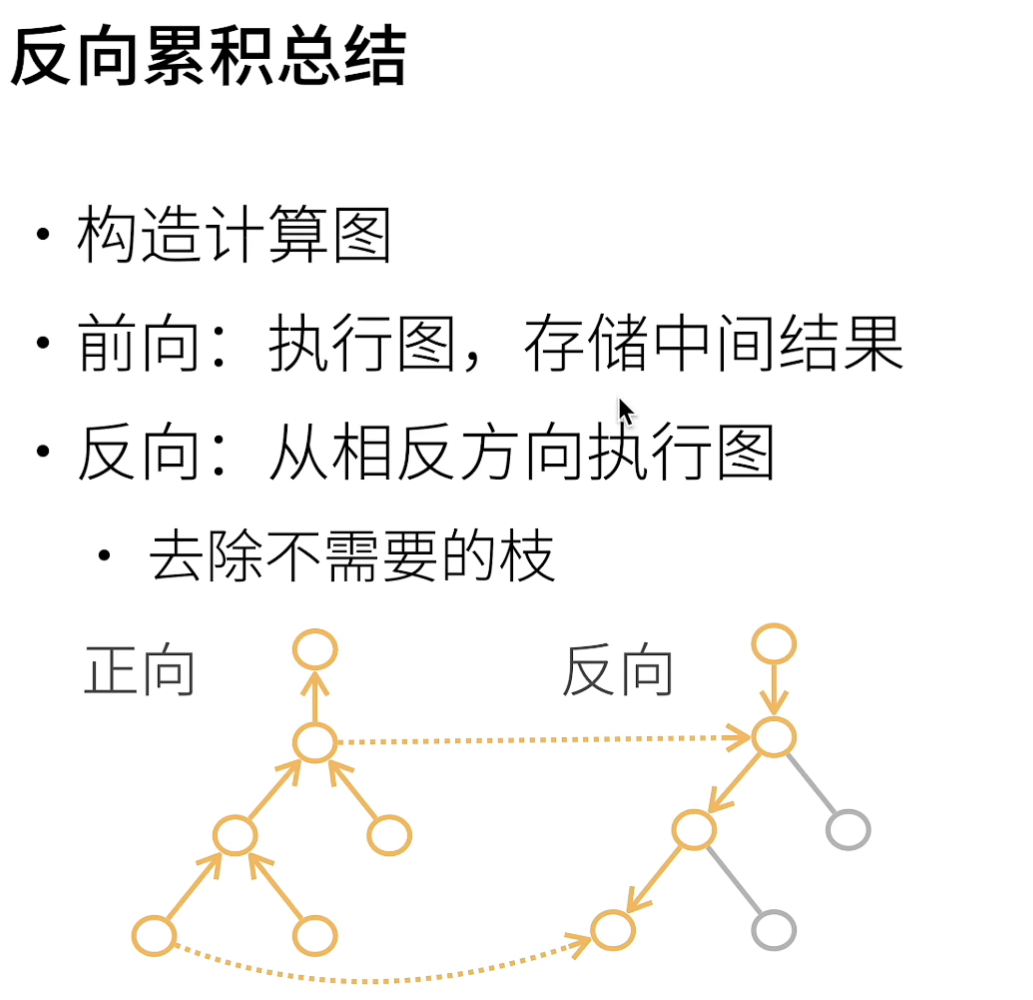
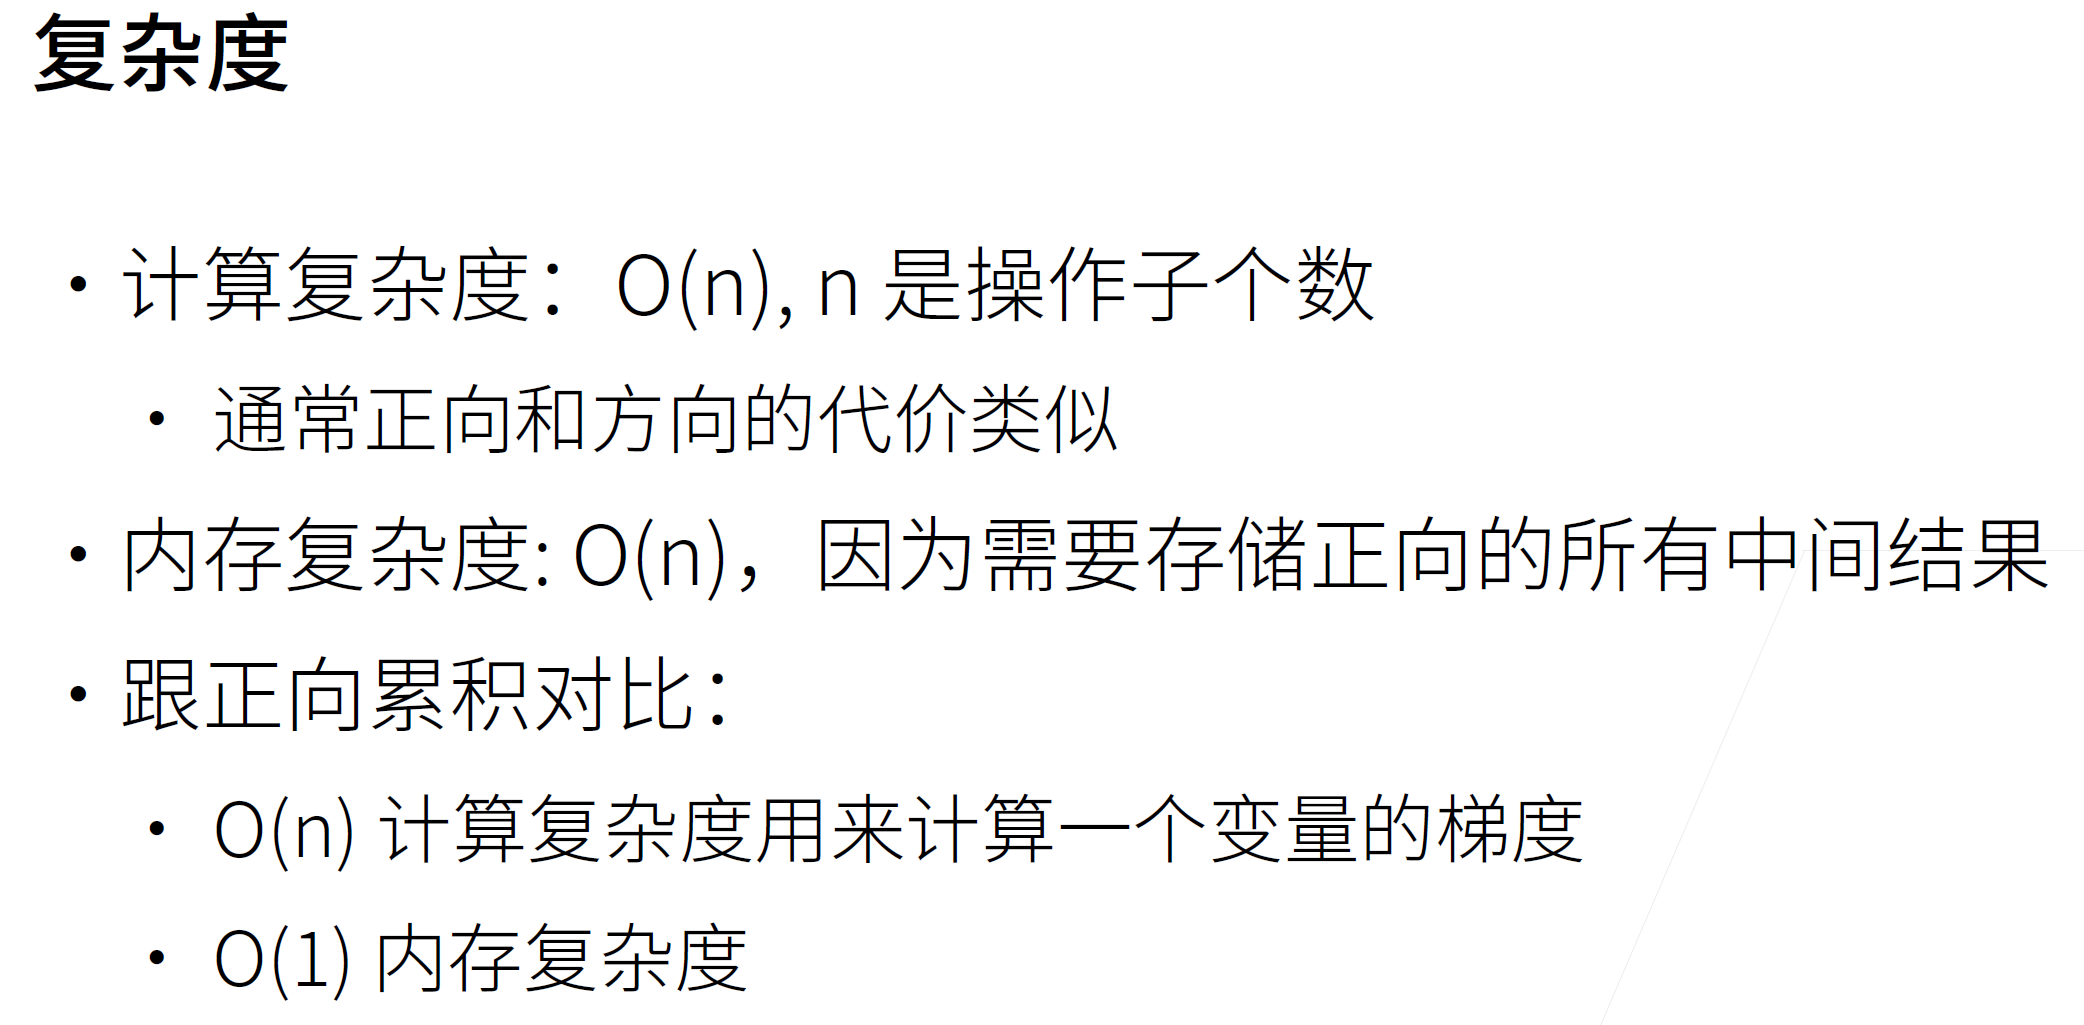

In [2]:
import torch
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [3]:
 x.dtype

torch.float32

计算y关于x梯度前，需要一个地方来存储梯度

In [4]:
x.requires_grad_(True) # 等价于 x = torch.arange(4.0, requires_grad=True)
x.grad # 默认 None

In [5]:
print(x.grad)

None


In [6]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

通过调用反向传播函数来自动计算y关于x每个分量的梯度

In [7]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [8]:
x.grad == 4 * x

tensor([True, True, True, True])

In [9]:
# pytorch中默认情况下，会累积梯度，我们需要清楚之前的值来计算下一个梯度
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### 深度学习中，目的不是计算微分矩阵，而且批量中的每个样本单独计算的偏导数之和

In [12]:
# 对非标量调用 backward 需要传入一个 gradient 参数，该参数指定微分函数
x.grad.zero_()
y = x * x
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [13]:
# 将某些计算移动到计算图之外
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x
z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [14]:
u

tensor([0., 1., 4., 9.])

In [15]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x


tensor([True, True, True, True])

### 即使构建函数的计算图需要Python控制流（如条件、循环或任意函数调用），我们仍可以计算得到变量的梯度

In [19]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

a.grad == d / a

tensor(True)

In [20]:
a.grad

tensor(512.)